In [31]:
import os
os.listdir()


['.config',
 'trained_model.h5',
 'train-images.idx3-ubyte',
 't10k-labels.idx1-ubyte',
 'sample_test_predictions.csv',
 'train-labels.idx1-ubyte',
 't10k-images.idx3-ubyte',
 'sample_predictions.png',
 'sample_data']

In [32]:
from google.colab import files

uploaded = files.upload()  # Select all 4 MNIST files from your PC


Saving t10k-images.idx3-ubyte to t10k-images (1).idx3-ubyte
Saving t10k-labels.idx1-ubyte to t10k-labels (1).idx1-ubyte
Saving train-images.idx3-ubyte to train-images (1).idx3-ubyte
Saving train-labels.idx1-ubyte to train-labels (1).idx1-ubyte


In [33]:
import os
os.listdir()


['.config',
 'trained_model.h5',
 'train-images.idx3-ubyte',
 't10k-labels.idx1-ubyte',
 't10k-labels (1).idx1-ubyte',
 'sample_test_predictions.csv',
 'train-labels.idx1-ubyte',
 'train-images (1).idx3-ubyte',
 't10k-images.idx3-ubyte',
 'train-labels (1).idx1-ubyte',
 'sample_predictions.png',
 't10k-images (1).idx3-ubyte',
 'sample_data']

In [34]:
import numpy as np
import struct
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# --- Functions to load MNIST images & labels ---
def load_idx_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(num_images, rows, cols)

def load_idx_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_items = struct.unpack(">II", f.read(8))
        return np.frombuffer(f.read(), dtype=np.uint8)

# --- Load dataset ---
X_train = load_idx_images("train-images.idx3-ubyte")
y_train = load_idx_labels("train-labels.idx1-ubyte")
X_test = load_idx_images("t10k-images.idx3-ubyte")
y_test = load_idx_labels("t10k-labels.idx1-ubyte")

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)
print("Pixel range before normalization:", X_train.min(), "to", X_train.max())

Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)
Pixel range before normalization: 0 to 255


In [35]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print("Pixel range after normalization:", X_train.min(), "to", X_train.max())

Pixel range after normalization: 0.0 to 1.0


In [36]:
img_original = X_train[0]
img_resized = cv2.resize(img_original, (64, 64))
print("Original size:", img_original.shape)
print("Resized size:", img_resized.shape)

Original size: (28, 28)
Resized size: (64, 64)


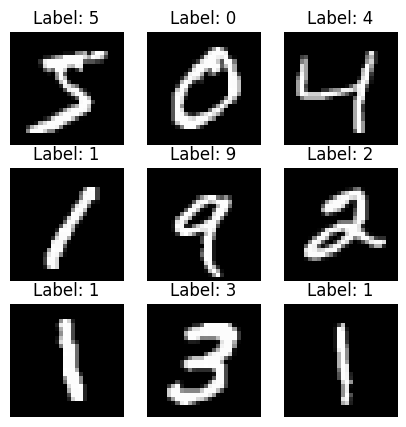

In [37]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [38]:
img_uint8 = (X_train[0] * 255).astype('uint8')
cv2_imshow(img_uint8)

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [39]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values (0–255) → (0–1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape for CNN (28x28 → 28x28x1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print("Train shape:", train_images.shape)
print("Test shape:", test_images.shape)


Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [40]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0–9
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:
history = model.fit(
    train_images, train_labels,
    epochs=5,                 # Try increasing for better accuracy
    validation_data=(test_images, test_labels)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9833 - loss: 0.0520 - val_accuracy: 0.9874 - val_loss: 0.0361
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9897 - loss: 0.0341 - val_accuracy: 0.9891 - val_loss: 0.0335
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9925 - loss: 0.0235 - val_accuracy: 0.9895 - val_loss: 0.0342
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9941 - loss: 0.0179 - val_accuracy: 0.9894 - val_loss: 0.0342
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9962 - loss: 0.0117 - val_accuracy: 0.9900 - val_loss: 0.0339


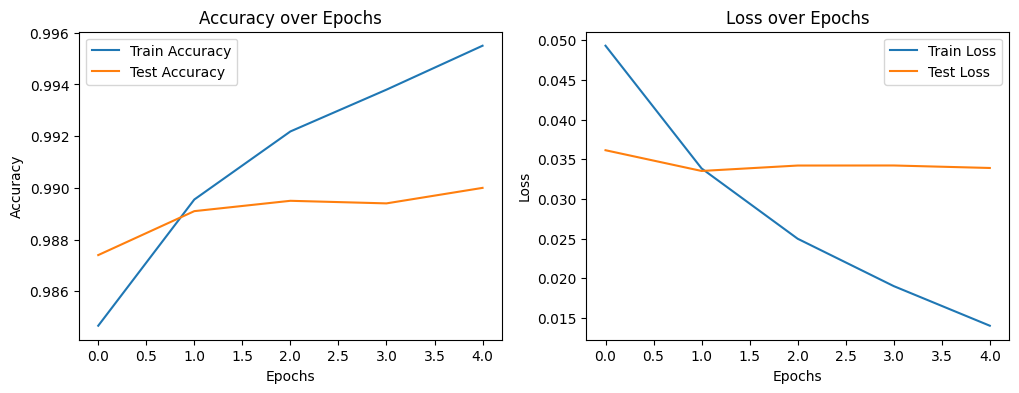

In [15]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\n✅ Test accuracy: {test_acc * 100:.2f}%")


313/313 - 4s - 11ms/step - accuracy: 0.9900 - loss: 0.0339

✅ Test accuracy: 99.00%


In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [18]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
y_train = y_train.flatten()
y_test = y_test.flatten()

In [19]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [20]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 112ms/step - accuracy: 0.5711 - loss: 1.2043 - val_accuracy: 0.6086 - val_loss: 1.1037
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 113ms/step - accuracy: 0.5883 - loss: 1.1491 - val_accuracy: 0.6200 - val_loss: 1.0646
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.6018 - loss: 1.1089 - val_accuracy: 0.6287 - val_loss: 1.0544
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 114ms/step - accuracy: 0.6186 - loss: 1.0799 - val_accuracy: 0.6568 - val_loss: 0.9775
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.6364 - loss: 1.0307 - val_accuracy: 0.6458 - val_loss: 1.0140
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 114ms/step - accuracy: 0.6414 - loss: 1.0085 - val_accuracy: 0.6635 - val_loss: 0.9486
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.6579 - loss: 0.9800 - val_accuracy: 0.6778 - val_loss: 0.9244
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 113ms/step - accuracy: 0.6543 - loss: 

In [23]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1000
           1       0.84      0.77      0.81      1000
           2       0.80      0.46      0.58      1000
           3       0.62      0.43      0.51      1000
           4       0.62      0.68      0.65      1000
           5       0.68      0.57      0.62      1000
           6       0.70      0.85      0.77      1000
           7       0.69      0.78      0.73      1000
           8       0.76      0.86      0.80      1000
           9       0.65      0.90      0.75      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



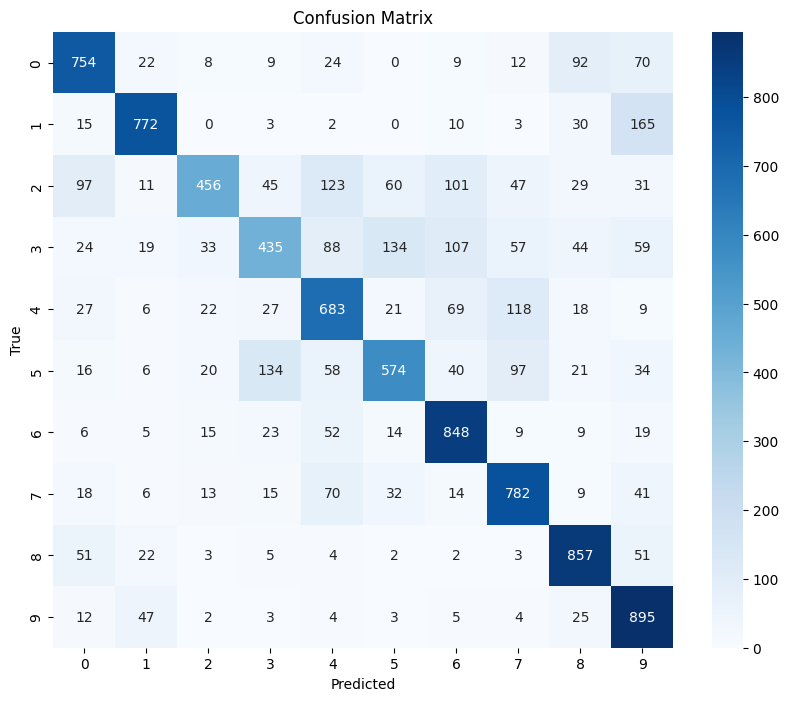

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Accuracy over Epochs')

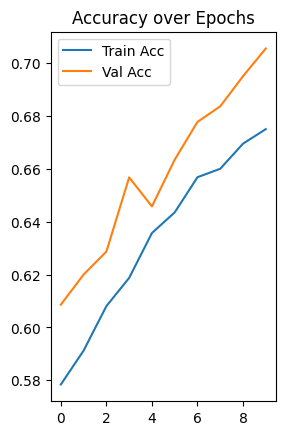

In [27]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')

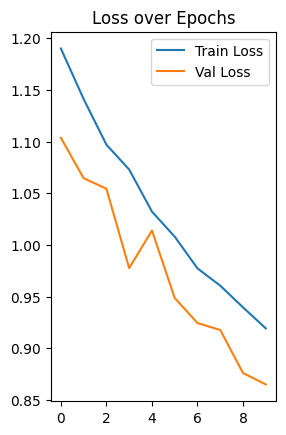

In [28]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [31]:
# Training data
train_images_path = "train-images.idx3-ubyte"
train_labels_path = "train-labels.idx1-ubyte"

# Validation (or test) data
test_images_path = "t10k-images.idx3-ubyte"
test_labels_path = "t10k-labels.idx1-ubyte"


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize for custom CNN
train_images_cnn = train_images / 255.0
test_images_cnn = test_images / 255.0

# Expand dims for CNN input
train_images_cnn = np.expand_dims(train_images_cnn, -1)
test_images_cnn = np.expand_dims(test_images_cnn, -1)

# One-hot encode labels
train_labels_cnn = to_categorical(train_labels, 10)
test_labels_cnn = to_categorical(test_labels, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Convert grayscale to RGB (MobileNet needs 3 channels)
train_images_mnet = np.repeat(train_images[..., np.newaxis], 3, axis=-1)
test_images_mnet = np.repeat(test_images[..., np.newaxis], 3, axis=-1)

# Resize to MobileNetV2 input size (96x96 for speed)
train_images_mnet = tf.image.resize(train_images_mnet, [96, 96])
test_images_mnet = tf.image.resize(test_images_mnet, [96, 96])

# Preprocess
train_images_mnet = preprocess_input(train_images_mnet)
test_images_mnet = preprocess_input(test_images_mnet)

train_labels_mnet = to_categorical(train_labels, 10)
test_labels_mnet = to_categorical(test_labels, 10)


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
batch_size = 64

train_images_cnn = (train_images / 255.0)[..., np.newaxis]
test_images_cnn = (test_images / 255.0)[..., np.newaxis]

train_labels_cnn = to_categorical(train_labels, 10)
test_labels_cnn = to_categorical(test_labels, 10)

train_ds_cnn = tf.data.Dataset.from_tensor_slices((train_images_cnn, train_labels_cnn)).batch(batch_size)
test_ds_cnn = tf.data.Dataset.from_tensor_slices((test_images_cnn, test_labels_cnn)).batch(batch_size)


In [5]:
train_images_mnet = np.repeat(train_images[..., np.newaxis], 3, axis=-1)
test_images_mnet = np.repeat(test_images[..., np.newaxis], 3, axis=-1)

# Resize + preprocess in tf.data pipeline (saves RAM)
def preprocess_mnet(image, label):
    image = tf.image.resize(image, [96, 96])
    image = preprocess_input(image)
    return image, label

train_labels_mnet = to_categorical(train_labels, 10)
test_labels_mnet = to_categorical(test_labels, 10)

train_ds_mnet = tf.data.Dataset.from_tensor_slices((train_images_mnet, train_labels_mnet)) \
    .map(preprocess_mnet, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(batch_size) \
    .prefetch(tf.data.AUTOTUNE)

test_ds_mnet = tf.data.Dataset.from_tensor_slices((test_images_mnet, test_labels_mnet)) \
    .map(preprocess_mnet, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(batch_size) \
    .prefetch(tf.data.AUTOTUNE)

In [6]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("Training Custom CNN...")
history_cnn = cnn_model.fit(train_ds_cnn,
                            validation_data=test_ds_cnn,
                            epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Custom CNN...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8912 - loss: 0.3842 - val_accuracy: 0.9790 - val_loss: 0.0651
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9822 - loss: 0.0574 - val_accuracy: 0.9853 - val_loss: 0.0431
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9886 - loss: 0.0376 - val_accuracy: 0.9861 - val_loss: 0.0380
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9915 - loss: 0.0275 - val_accuracy: 0.9869 - val_loss: 0.0381
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9941 - loss: 0.0203 - val_accuracy: 0.9876 - val_loss: 0.0404


In [7]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
base_model.trainable = False  # Freeze base layers

mnet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

mnet_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

print("Training MobileNetV2 (Frozen Base)...")
history_mnet = mnet_model.fit(train_ds_mnet,
                              validation_data=test_ds_mnet,
                              epochs=5)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training MobileNetV2 (Frozen Base)...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.8679 - loss: 0.4070 - val_accuracy: 0.9627 - val_loss: 0.1147
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9576 - loss: 0.1325 - val_accuracy: 0.9687 - val_loss: 0.0955
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9644 - loss: 0.1068 - val_accuracy: 0.9688 - val_loss: 0.0924
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9682 - loss: 0.0952 - val_accuracy: 0.9734 - val_loss: 0.0841
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9719 - loss: 0.0817 - val_accuracy: 0.9687 - val_loss: 0.0976


In [8]:
cnn_acc = history_cnn.history['val_accuracy'][-1]
mnet_acc = history_mnet.history['val_accuracy'][-1]
improvement = (mnet_acc - cnn_acc) * 100

print("\n📊 Comparison:")
print(f"Custom CNN Accuracy: {cnn_acc*100:.2f}%")
print(f"MobileNetV2 Accuracy: {mnet_acc*100:.2f}%")
print(f"Improvement: {improvement:.2f}%")


📊 Comparison:
Custom CNN Accuracy: 98.76%
MobileNetV2 Accuracy: 96.87%
Improvement: -1.89%


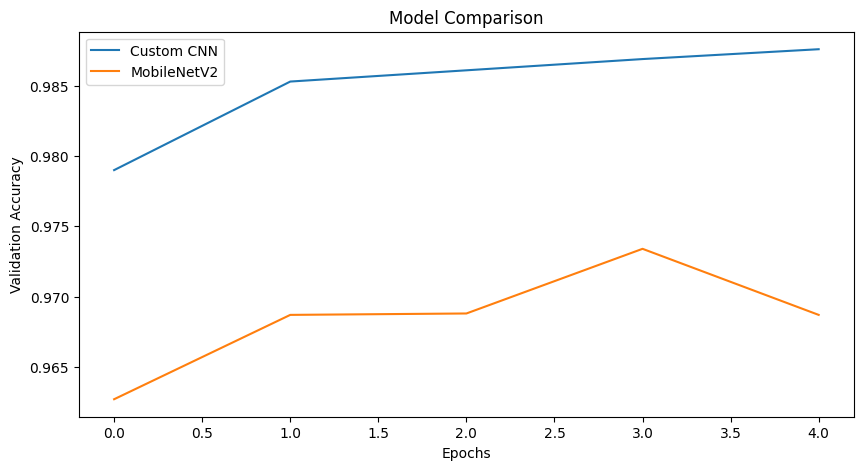

In [9]:
plt.figure(figsize=(10,5))
plt.plot(history_cnn.history['val_accuracy'], label='Custom CNN')
plt.plot(history_mnet.history['val_accuracy'], label='MobileNetV2')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Model Comparison")
plt.legend()
plt.show()

In [16]:
from google.colab import files

# Replace 'model' with your trained model variable
model.save('trained_model.h5')
files.download('trained_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [21]:
y_true = np.argmax(test_labels_cnn, axis=1)
y_pred_probs = cnn_model.predict(test_images_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [22]:
df_predictions = pd.DataFrame({
    'True_Label': y_true,
    'Predicted_Label': y_pred
})
df_predictions.to_csv('sample_test_predictions.csv', index=False)
files.download('sample_test_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Saved and downloaded: sample_test_predictions.csv & sample_predictions.png


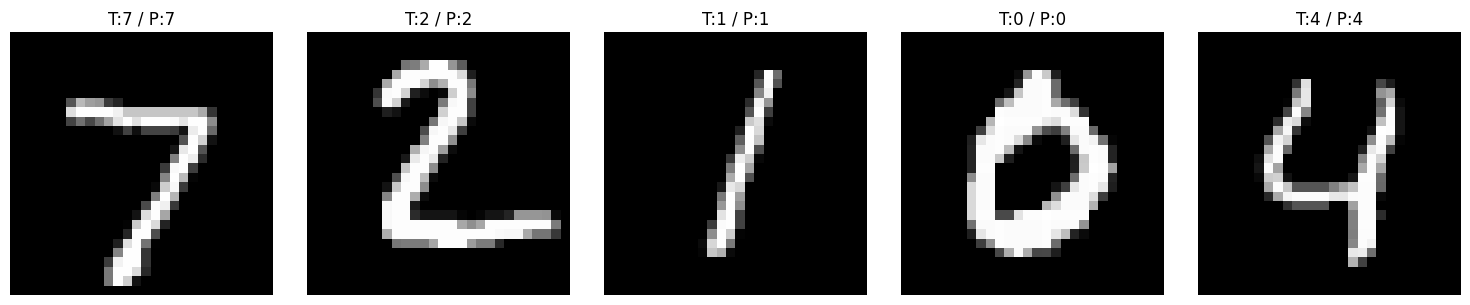

In [23]:
num_samples = 5
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(test_images_cnn[i].reshape(28, 28), cmap='gray')
    plt.title(f"T:{y_true[i]} / P:{y_pred[i]}")
    plt.axis('off')

plt.tight_layout()
plt.savefig('sample_predictions.png')
files.download('sample_predictions.png')

print("✅ Saved and downloaded: sample_test_predictions.csv & sample_predictions.png")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step


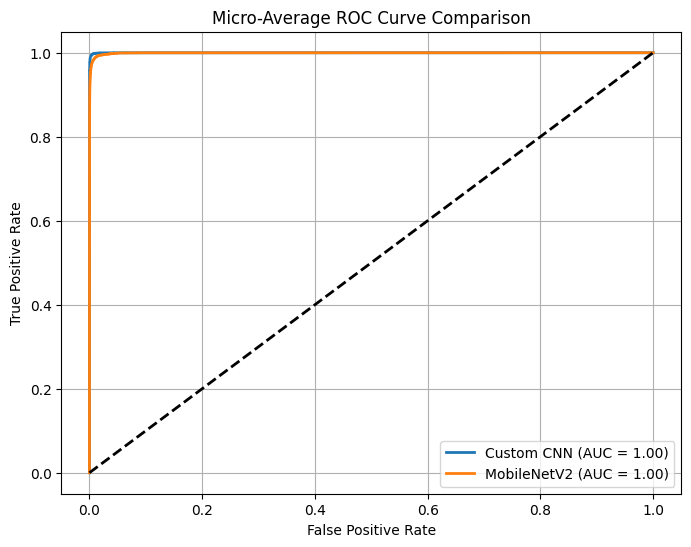

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Number of classes
n_classes = 10

# Get model predictions (probabilities)
y_score_cnn = cnn_model.predict(test_ds_cnn)
y_score_mnet = mnet_model.predict(test_ds_mnet)

# True labels (already one-hot encoded in test_labels_cnn)
y_true = test_labels_cnn  # shape: (num_samples, 10)

# Compute ROC curve and AUC for each class (CNN)
fpr_cnn = dict()
tpr_cnn = dict()
roc_auc_cnn = dict()

for i in range(n_classes):
    fpr_cnn[i], tpr_cnn[i], _ = roc_curve(y_true[:, i], y_score_cnn[:, i])
    roc_auc_cnn[i] = auc(fpr_cnn[i], tpr_cnn[i])

# Micro-average ROC (CNN)
fpr_cnn["micro"], tpr_cnn["micro"], _ = roc_curve(y_true.ravel(), y_score_cnn.ravel())
roc_auc_cnn["micro"] = auc(fpr_cnn["micro"], tpr_cnn["micro"])

# Compute ROC curve and AUC for each class (MobileNetV2)
fpr_mnet = dict()
tpr_mnet = dict()
roc_auc_mnet = dict()

for i in range(n_classes):
    fpr_mnet[i], tpr_mnet[i], _ = roc_curve(y_true[:, i], y_score_mnet[:, i])
    roc_auc_mnet[i] = auc(fpr_mnet[i], tpr_mnet[i])

# Micro-average ROC (MobileNetV2)
fpr_mnet["micro"], tpr_mnet["micro"], _ = roc_curve(y_true.ravel(), y_score_mnet.ravel())
roc_auc_mnet["micro"] = auc(fpr_mnet["micro"], tpr_mnet["micro"])

# Plot Micro-average ROC for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_cnn["micro"], tpr_cnn["micro"],
         label=f'Custom CNN (AUC = {roc_auc_cnn["micro"]:.2f})', linewidth=2)
plt.plot(fpr_mnet["micro"], tpr_mnet["micro"],
         label=f'MobileNetV2 (AUC = {roc_auc_mnet["micro"]:.2f})', linewidth=2)

# Reference line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-Average ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
